In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
jpeg_validation = {0: [99.8581560283688], 1: [98.53427895981088, 99.16748285994123], 2: [99.05437352245863, 97.60039177277179, 99.83991462113127], 3: [97.44680851063829, 92.94809010773751, 93.91675560298826, 99.09365558912387], 4: [98.77068557919621, 95.98432908912831, 95.35752401280683, 96.0221550855992, 99.14271306101865]}

ksvd_validation = {0: [99.90543735224587],
                   1: [73.85342789598108, 99.31439764936337],
                   2: [91.53664302600473, 65.57296767874632, 99.46638207043756],
                   3: [93.47517730496453, 73.55533790401567, 73.2657417289221, 99.64753272910373],
                   4: [70.96926713947991, 81.23404255319149, 77.2771792360431, 73.85342789598108, 99.31439764936337]}

pca_validation = {0: [99.95271867612293], 1: [96.548463356974, 99.06953966699314], 2: [99.00709219858156, 96.81684622918708, 99.73319103521878], 3: [91.91489361702128, 82.51714005876592, 73.53255069370331, 99.8489425981873], 4: [79.29078014184397, 65.47502448579824, 41.9957310565635, 54.48136958710977, 99.4957135653051]}

csc_validation = {0: [100.0],
                  1: [2.316784869976359, 99.65719882468169],
                  2: [63.593380614657214, 1.909892262487757, 100.0],
                  3: [23.120567375886523, 11.018609206660138, 47.33191035218783, 99.9496475327291],
                  4: [36.643026004728135, 1.909892262487757, 6.4034151547492, 24.924471299093657, 99.64699949571356]}

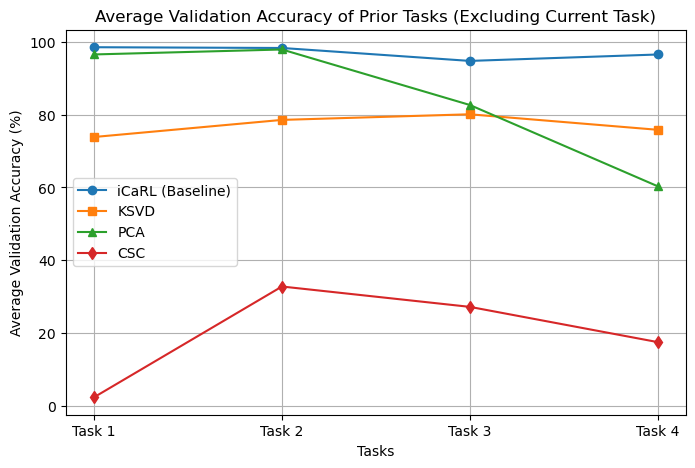

In [3]:
def calculate_averages(data):
    return [np.mean(values[:-1]) if len(values) > 1 else None for _, values in data.items()]

# Calculating the averages for each method
jpeg_averages = calculate_averages(jpeg_validation)
ksvd_averages = calculate_averages(ksvd_validation)
pca_averages = calculate_averages(pca_validation)
csc_averages = calculate_averages(csc_validation)

# Prepare x-axis labels
tasks = [f"Task {i}" for i in range(len(jpeg_averages))]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(tasks, jpeg_averages, marker='o', label="iCaRL (Baseline)")
plt.plot(tasks, ksvd_averages, marker='s', label="KSVD")
plt.plot(tasks, pca_averages, marker='^', label="PCA")
plt.plot(tasks, csc_averages, marker='d', label="CSC")

plt.xlabel("Tasks")
plt.ylabel("Average Validation Accuracy (%)")
plt.title("Average Validation Accuracy of Prior Tasks (Excluding Current Task)")
plt.legend()
plt.grid(True)
plt.show()

In [1]:
icarl_raw_memory = 750 * 1 * 28 * 28  # 750 exemplars with shape (1, 28, 28)
jpeg_memory = 2320161/5
pca_memory = 240000 + 260 * 1024  # 240000 B + 249 KB
ksvd_memory = 270000 + 282240  # buffer + dictionary memory
csc_memory = 66000 + 1000  # buffer + conv weights

# Calculate percentage reduction relative to raw memory
memory_data = {
    "iCaRL (Raw Images)": 0,
    "jpeg": 100 * (icarl_raw_memory - jpeg_memory) / icarl_raw_memory,
    "PCA": 100 * (icarl_raw_memory - pca_memory) / icarl_raw_memory,
    "KSVD": 100 * (icarl_raw_memory - ksvd_memory) / icarl_raw_memory,
    "CSC": 100 * (icarl_raw_memory - csc_memory) / icarl_raw_memory
}


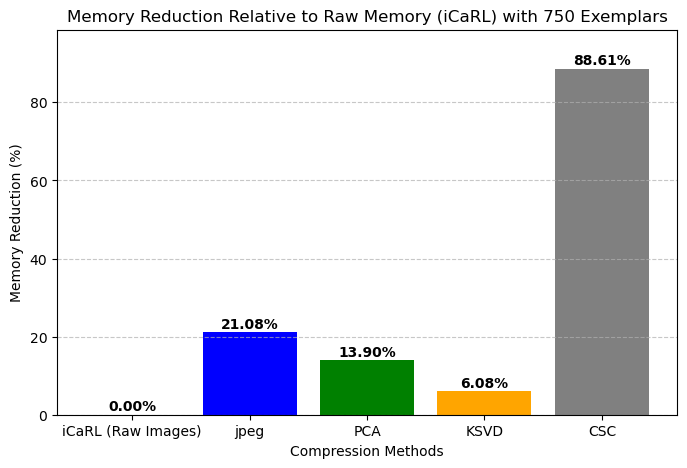

In [4]:
# Plotting
methods = list(memory_data.keys())
reductions = list(memory_data.values())

plt.figure(figsize=(8, 5))
plt.bar(methods, reductions, color=['gray', 'blue', 'green', 'orange'])
plt.xlabel("Compression Methods")
plt.ylabel("Memory Reduction (%)")
plt.title("Memory Reduction Relative to Raw Memory (iCaRL) with 750 Exemplars")
plt.ylim(0, max(reductions) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display percentage on top of each bar
for i, v in enumerate(reductions):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.show()

In [6]:
data = {
    'JPEG': {
        'K-means': {0: [99.8581560283688], 1: [98.53427895981088, 99.16748285994123], 2: [99.05437352245863, 97.60039177277179, 99.83991462113127], 3: [97.44680851063829, 92.94809010773751, 93.91675560298826, 99.09365558912387], 4: [98.77068557919621, 95.98432908912831, 95.35752401280683, 96.0221550855992, 99.14271306101865]},
        'DPP': {0: [99.90543735224587], 1: [97.91962174940899, 99.75514201762978], 2: [98.62884160756501, 96.91478942213516, 99.89327641408751], 3: [98.91252955082743, 94.76003917727718, 97.49199573105656, 99.59718026183283], 4: [96.50118203309692, 96.55964740450539, 94.23692636072572, 95.16616314199396, 99.29399899142713]},
        'Random': {0: [100.0], 1: [84.72813238770685, 97.55142017629775], 2: [97.58865248226951, 94.31929480901077, 99.19957310565636], 3: [95.83924349881796, 92.99706170421156, 93.11632870864462, 98.94259818731118], 4: [98.10874704491725, 95.34769833496571, 95.51760939167556, 92.14501510574019, 98.23499747856782]}
    },
    'K-SVD': {
        'K-means': {0: [99.90543735224587], 1: [97.16312056737588, 99.36336924583742], 2: [84.34988179669031, 47.0617042115573, 100.0], 3: [53.90070921985816, 28.256611165523996, 41.67556029882604, 100.0], 4: [69.07801418439716, 17.286973555337905, 7.04375667022412, 27.84491440080564, 99.3948562783661]},
        'DPP': {0: [99.95271867612293], 1: [94.60992907801419, 99.31439764936337], 2: [94.94089834515367, 66.40548481880509, 99.94663820704376], 3: [40.66193853427896, 15.181194906953968, 16.115261472785484, 99.8489425981873], 4: [79.76359338061465, 52.007835455435846, 26.73425827107791, 50.40281973816717, 99.3948562783661]},
        'Random' : {0: [99.95271867612293], 1: [79.00709219858156, 98.62879529872674], 2: [93.94799054373523, 82.56611165523996, 99.78655282817503], 3: [21.60756501182033, 13.46718903036239, 21.61152614727855, 99.8992950654582], 4: [85.05910165484633, 70.86190009794319, 70.75773745997866, 78.19738167170192, 99.14271306101865]}
    },
    'PCA': {
        'K-means': {0: [99.90543735224587], 1: [97.35224586288416, 99.65719882468169], 2: [42.78959810874704, 46.37610186092066, 99.94663820704376], 3: [87.42316784869976, 66.55239960822723, 64.56776947705443, 99.74823766364553], 4: [38.486997635933804, 12.340842311459353, 12.700106723585913, 22.860020140986908, 99.3948562783661]},
        'DPP': {0: [100.0], 1: [92.76595744680851, 98.82468168462292], 2: [97.21040189125296, 90.74436826640549, 99.89327641408751], 3: [94.79905437352245, 70.71498530852105, 76.57417289220918, 99.8992950654582], 4: [63.451536643026, 30.80313418217434, 19.370330843116328, 39.97985901309164, 99.59657085224407]},
        'Random': {0: [99.95271867612293], 1: [98.62884160756501, 99.65719882468169], 2: [94.70449172576832, 87.12047012732616, 100.0], 3: [92.57683215130024, 74.68168462291871, 76.20064034151548, 99.8992950654582], 4: [54.70449172576832, 19.58863858961802, 7.577374599786553, 32.225579053373615, 99.64699949571356]}
    },
    'CSC': {
        'K-means': {0: [100.0], 1: [12.624113475177305, 99.06953966699314], 2: [0.14184397163120568, 6.8560235063663075, 99.94663820704376], 3: [9.55082742316785, 40.646425073457394, 0.37353255069370334, 99.79859013091641], 4: [16.501182033096928, 11.655239960822723, 0.5336179295624333, 17.875125881168177, 99.64699949571356]},
        'DPP': {0: [100.0], 1: [10.8274231678487, 99.51028403525955], 2: [33.3806146572104, 0.5876591576885406, 99.89327641408751], 3: [0.0, 0.24485798237022527, 2.454642475987193, 99.9496475327291], 4: [3.404255319148936, 0.0, 0.0, 11.329305135951662, 99.24357034795764]},
        'Random': {0: [99.95271867612293], 1: [4.539007092198582, 99.51028403525955], 2: [0.0, 31.58667972575906, 99.89327641408751], 3: [0.0, 14.299706170421155, 0.0, 99.8489425981873], 4: [0.0, 45.494613124387854, 0.0, 0.0, 99.69742813918306]}
    }
}

In [7]:
def calculate_previous_task_avg(data):
    averages = {}
    for compression, methods in data.items():
        averages[compression] = {}
        for method, task_dict in methods.items():
            averages[compression][method] = []
            for task_num, values in task_dict.items():
                if task_num == 0:
                    continue  # No previous tasks to calculate for task 0
                previous_values = [v for i in range(task_num) for v in task_dict[i]]
                avg_previous = sum(previous_values) / len(previous_values)
                averages[compression][method].append(avg_previous)
    return averages

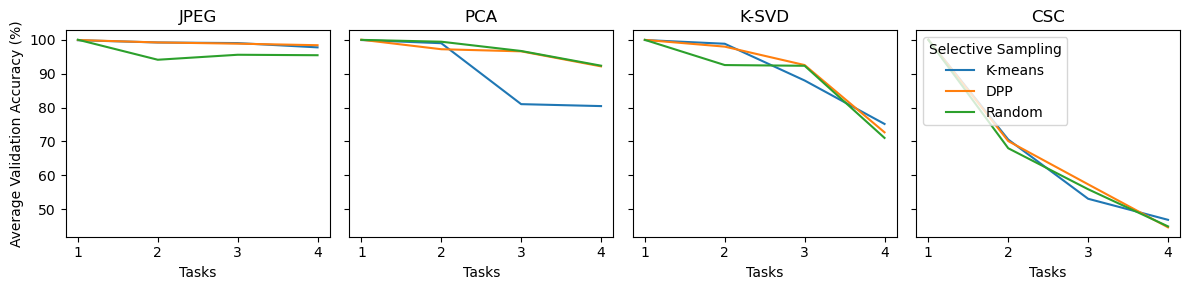

In [12]:
averaged_data = calculate_previous_task_avg(data)

# Plotting the averaged data
compression_methods = ['JPEG', 'PCA', 'K-SVD', 'CSC']
selective_sampling_methods = ['K-means', 'DPP', "Random"]
tasks = [1, 2, 3, 4]

fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

# Plot the data
for i, compression in enumerate(compression_methods):
    ax = axes[i]
    for sampling in selective_sampling_methods:
        ax.plot(tasks, averaged_data[compression][sampling], label=sampling)
    
    # Set title and labels
    ax.set_title(compression)
    ax.set_xlabel('Tasks')
    ax.set_xticks(tasks)
    
axes[0].set_ylabel('Average Validation Accuracy (%)')

# Add a legend to the first plot (or to each plot if needed)
plt.legend(title="Selective Sampling", loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

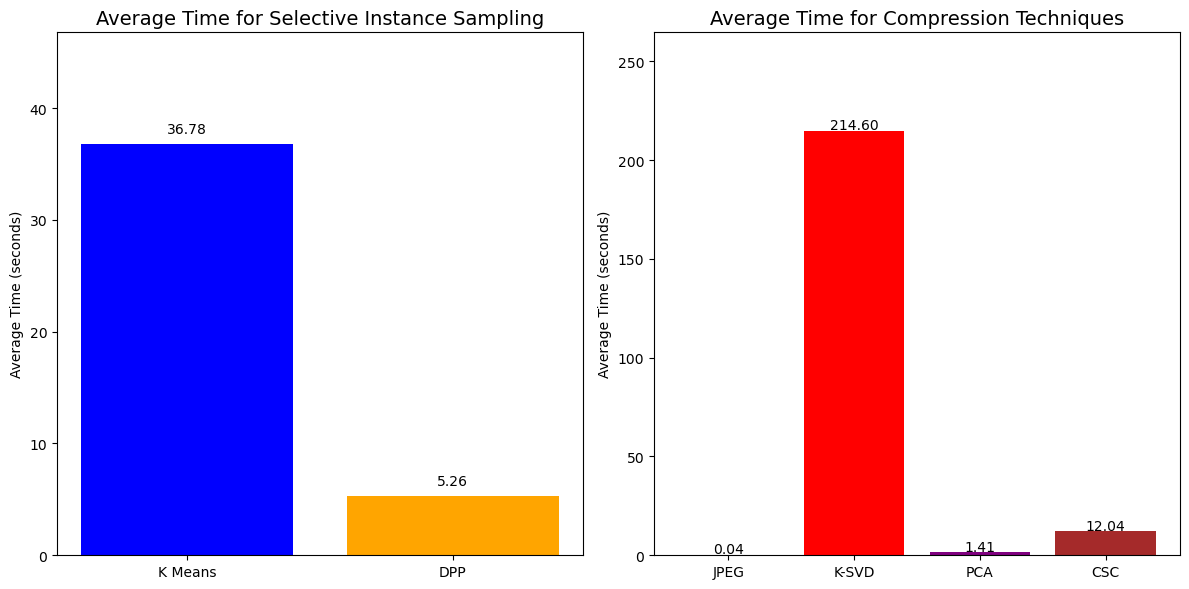

In [5]:
# Data for selective instance sampling
k_means_time = [41.30, 38.49, 29.87, 38.13, 36.13]
dpp_time = [5.833498477935791, 5.68662166595459, 4.47896146774292, 5.2229249477386475, 5.09022569756501]

# Data for compression techniques
jpeg_time = [0.04401135444641113, 0.04201030731201172, 0.04000973701477051, 0.0380096435546875, 0.03899788856506348]  
ksvd_time = [176.27314376831055, 250.13222312927246, 217.3897581100464, 201.57094526290894, 227.63289761543274]
pca_time = [1.466672420501709, 1.4013593196868896, 1.4066193103790283, 1.3914992809295654, 1.385617733001709]
csc_time = [13.07810354232788, 12.49334454536438, 11.286553621292114, 11.76453948020935, 11.557749271392822]

# Calculate average times
avg_k_means = np.mean(k_means_time)
avg_dpp = np.mean(dpp_time)
avg_jpeg = np.mean(jpeg_time)
avg_ksvd = np.mean(ksvd_time)
avg_pca = np.mean(pca_time)
avg_csc = np.mean(csc_time)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Selective Instance Sampling Bar Plot
axs[0].bar(['K Means', 'DPP'], [avg_k_means, avg_dpp], color=['blue', 'orange'])
axs[0].set_title('Average Time for Selective Instance Sampling', fontsize=14)
axs[0].set_ylabel('Average Time (seconds)')
axs[0].set_ylim(0, max(avg_k_means, avg_dpp) + 10)

for i, v in enumerate([avg_k_means, avg_dpp]):
    axs[0].text(i, v + 1, f"{v:.2f}", ha='center')

# Compression Techniques Bar Plot
axs[1].bar(['JPEG', 'K-SVD', 'PCA', 'CSC'], 
            [avg_jpeg, avg_ksvd, avg_pca, avg_csc], 
            color=['green', 'red', 'purple', 'brown'])
axs[1].set_title('Average Time for Compression Techniques', fontsize=14)
axs[1].set_ylabel('Average Time (seconds)')
axs[1].set_ylim(0, max(avg_jpeg, avg_ksvd, avg_pca, avg_csc) + 50)

for i, v in enumerate([avg_jpeg, avg_ksvd, avg_pca, avg_csc]):
    axs[1].text(i, v + 1, f"{v:.2f}", ha='center')
    
# Show plot
plt.tight_layout()
plt.show()